# Support Vector Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create linear separable data set

In [2]:
from sklearn.datasets import make_blobs

X,y=make_blobs(n_samples=500,centers=2,random_state=20)
X

array([[ 6.05487413e+00,  4.83917799e+00],
       [ 3.30025999e+00,  6.92264204e+00],
       [ 5.51231580e+00,  5.37854819e+00],
       [ 6.69042999e+00,  6.42759884e+00],
       [ 2.29034449e+00,  8.11011278e+00],
       [ 2.43925569e+00,  8.78538034e+00],
       [ 7.46559415e+00,  6.01476085e+00],
       [ 7.50098576e+00,  4.98996139e+00],
       [ 8.17041088e+00,  4.56323138e+00],
       [ 7.58527327e+00,  7.73963658e+00],
       [ 8.39610912e+00,  6.12838910e+00],
       [ 1.49704227e+00,  6.91368146e+00],
       [ 1.65394605e+00,  9.87490521e+00],
       [ 8.04398719e+00,  8.61892674e+00],
       [ 2.11618757e+00,  8.74298179e+00],
       [ 7.98001100e+00,  4.88780791e+00],
       [-1.78650270e-01,  8.29570927e+00],
       [ 7.73680293e+00,  5.90731969e+00],
       [ 2.23353713e+00,  9.60175963e+00],
       [ 1.54718391e+00,  7.36395988e+00],
       [ 6.89553922e+00,  6.53750691e+00],
       [ 7.30778179e+00,  4.93063640e+00],
       [ 1.86140464e+00,  7.72595353e+00],
       [ 7.

In [3]:
y

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,

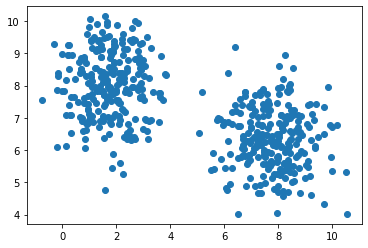

In [4]:
plt.scatter(X[:,0],X[:,1]);

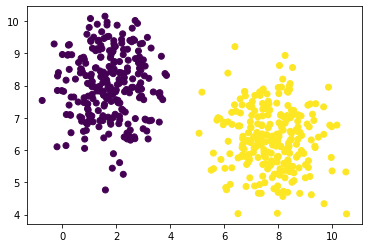

In [5]:
plt.scatter(X[:,0],X[:,1],c=y);

## SVC- linear

In [6]:
from sklearn.svm import SVC

svc_lin=SVC(kernel='linear')
svc_lin=svc_lin.fit(X,y)

In [7]:
svc_lin

SVC(kernel='linear')

In [8]:
# Plotting the surface

def plot_SVC_surface(model):
    
    # Identifying Axis

    ax=plt.gca()

    x_lim=ax.get_xlim() 
    y_lim=ax.get_ylim()

   

    # Creating a collection of x and y values wihtin this range

    xx=np.linspace(x_lim[0],x_lim[1],50)
    yy=np.linspace(y_lim[0],y_lim[1],50)
    
    # Creating a meshgrid using these xx and yy

    XX,YY=np.meshgrid(xx,yy) 

    # Creatign a stack of these

    xy=np.vstack([XX.ravel(),YY.ravel()]).T



    # Creating decision boundary using these values

    Z=model.decision_function(xy).reshape(XX.shape)
    

    ax.contour(XX, YY, Z,colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '--'])

    # plotting  support vectors obtained 
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=200,
               linewidth=1, facecolors='none', edgecolors='none')
    plt.show()

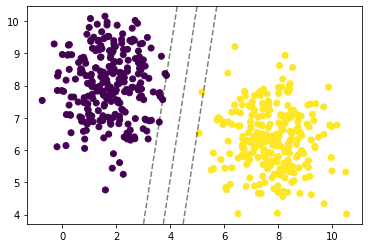

In [9]:
plt.scatter(X[:,0],X[:,1],c=y)
plot_SVC_surface(svc_lin);

### Regularisation parameter

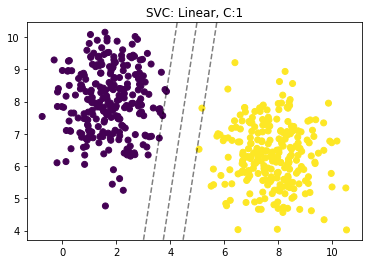

In [10]:
svc_lin=SVC(kernel='linear',C=1)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:1')
plot_SVC_surface(svc_lin);

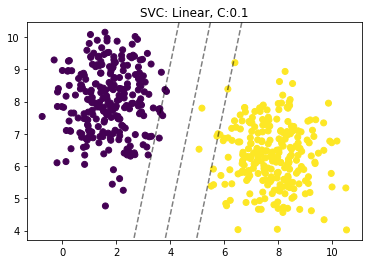

In [11]:
svc_lin=SVC(kernel='linear',C=0.1)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:0.1')
plot_SVC_surface(svc_lin);

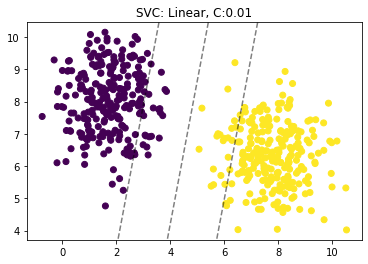

In [12]:
svc_lin=SVC(kernel='linear',C=0.01)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:0.01')
plot_SVC_surface(svc_lin);

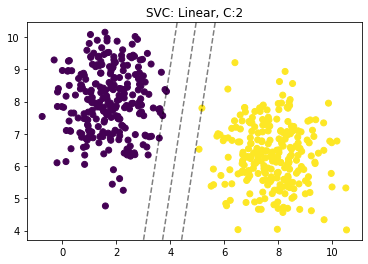

In [13]:
svc_lin=SVC(kernel='linear',C=2)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:2')
plot_SVC_surface(svc_lin);

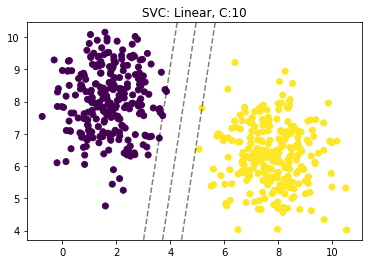

In [14]:
svc_lin=SVC(kernel='linear',C=10)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:10')
plot_SVC_surface(svc_lin);

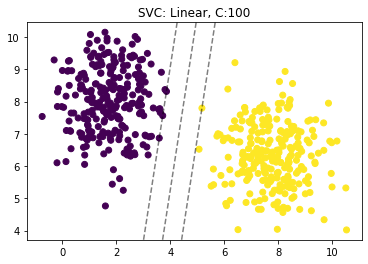

In [15]:
svc_lin=SVC(kernel='linear',C=100)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:100')
plot_SVC_surface(svc_lin);

## Creating a non-linear dataset

In [16]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=500, random_state=30)
X

array([[ 8.63923417e-01,  5.03623202e-01],
       [ 9.62027672e-01, -2.72951936e-01],
       [-8.50994482e-01,  5.25174630e-01],
       [ 6.70022432e-01,  4.37115477e-01],
       [ 8.50994482e-01,  5.25174630e-01],
       [ 7.11535677e-01,  7.02649970e-01],
       [ 5.96752916e-01, -5.32809494e-01],
       [ 5.96752916e-01,  5.32809494e-01],
       [ 5.69228542e-01,  5.62119976e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [ 1.69605688e-01, -7.81814499e-01],
       [ 1.69605688e-01,  7.81814499e-01],
       [-7.45941145e-01, -6.66011867e-01],
       [ 1.00000000e+00,  0.00000000e+00],
       [-9.47098305e-01, -3.20943610e-01],
       [ 9.47098305e-01, -3.20943610e-01],
       [ 4.94287690e-01, -6.29030746e-01],
       [-1.87381315e-01, -9.82287251e-01],
       [ 7.93990399e-01,  6.07930298e-01],
       [-6.37423990e-01,  7.70513243e-01],
       [-1.12856385e-01,  9.93611311e-01],
       [ 6.22769841e-01,  5.02153089e-01],
       [ 9.29776486e-01, -3.68124553e-01],
       [ 7.

In [17]:
y

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,

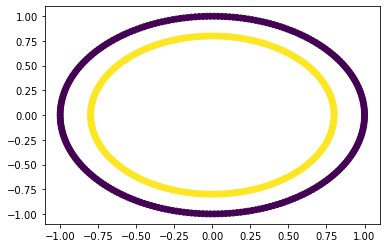

In [18]:
plt.scatter(X[:,0],X[:,1],c=y);

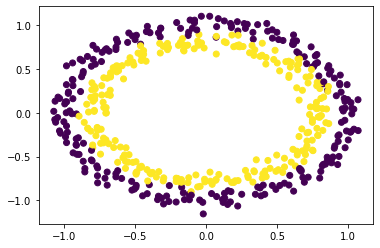

In [19]:
X,y=make_circles(n_samples=500, random_state=30,noise=0.05)
plt.scatter(X[:,0],X[:,1],c=y);

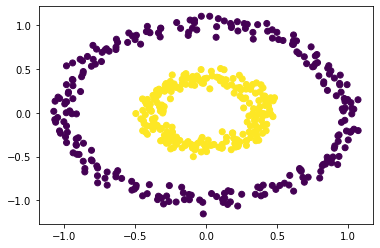

In [20]:
X,y=make_circles(n_samples=500, random_state=30,
                 noise=0.05,factor=0.4)
plt.scatter(X[:,0],X[:,1],c=y);

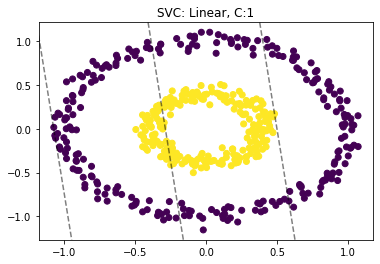

In [21]:
svc_lin=SVC(kernel='linear',C=1)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:1')
plot_SVC_surface(svc_lin);

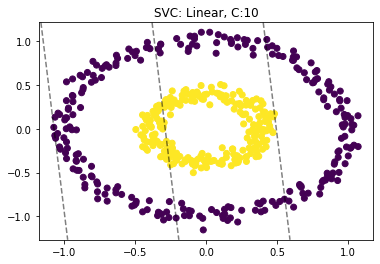

In [22]:
svc_lin=SVC(kernel='linear',C=10)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:10')
plot_SVC_surface(svc_lin);

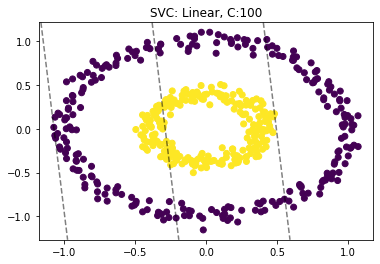

In [23]:
svc_lin=SVC(kernel='linear',C=100)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:100')
plot_SVC_surface(svc_lin);

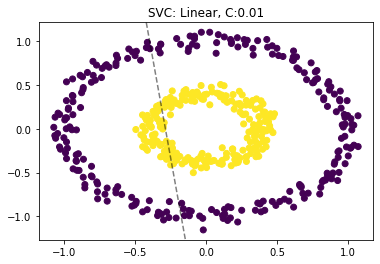

In [24]:
svc_lin=SVC(kernel='linear',C=0.01)
svc_lin=svc_lin.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Linear, C:0.01')
plot_SVC_surface(svc_lin);

## Non- linear kernels

### kernel= poly

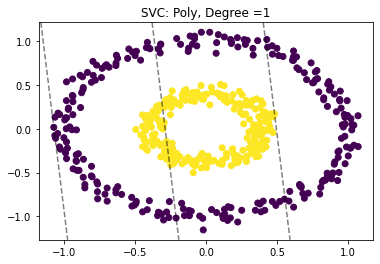

In [25]:
svc_poly=SVC(kernel='poly',degree=1)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Poly, Degree =1')
plot_SVC_surface(svc_poly);

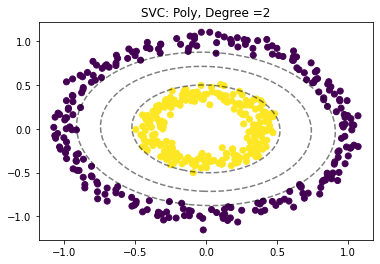

In [26]:
svc_poly=SVC(kernel='poly',degree=2)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Poly, Degree =2')
plot_SVC_surface(svc_poly);

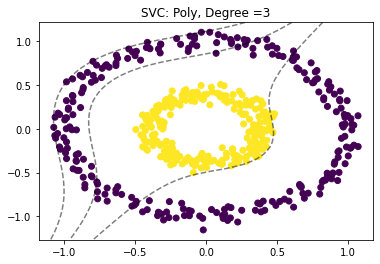

In [27]:
svc_poly=SVC(kernel='poly',degree=3)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Poly, Degree =3')
plot_SVC_surface(svc_poly);

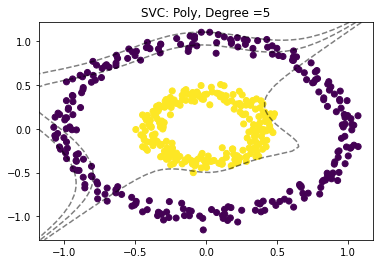

In [28]:
svc_poly=SVC(kernel='poly',degree=5)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Poly, Degree =5')
plot_SVC_surface(svc_poly);

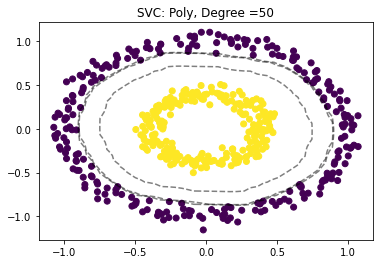

In [29]:
svc_poly=SVC(kernel='poly',degree=50)
svc_poly=svc_poly.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Poly, Degree =50')
plot_SVC_surface(svc_poly);

### kernel = sigmoid

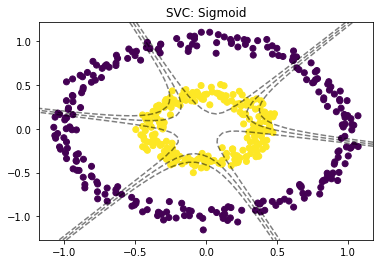

In [30]:
svc_sig=SVC(kernel='sigmoid')
svc_sig=svc_sig.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: Sigmoid')
plot_SVC_surface(svc_sig);

### kernel= rbf

Radial Basis Function

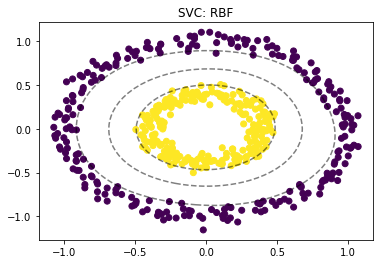

In [31]:
svc_rbf=SVC(kernel='rbf')
svc_rbf=svc_rbf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC: RBF')
plot_SVC_surface(svc_rbf);

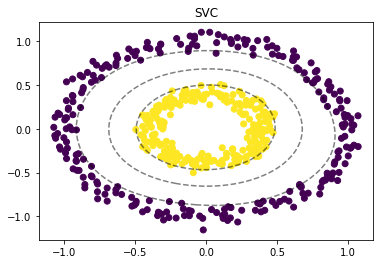

In [33]:
svc=SVC()
svc=svc.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)
plt.title('SVC')
plot_SVC_surface(svc);